<a href="https://colab.research.google.com/github/LarryDCJ/AC_Classifier/blob/master/aircraft_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/repos/AC_Classifier
! pip install fastbook
! pip install utils
from utils import *
from fastai.data.all import *
from fastai.vision.all import *
from fastai.metrics import error_rate
from fastai.vision.widgets import *
import re
import pathlib
from pathlib import Path
from IPython.display import Image
import os
config_file = Path("~/.fastai/config.yml").expanduser()
if config_file.exists(): os.remove(config_file)
assert not config_file.exists()
config = Config()
assert config_file.exists()
config['archive_path'] = Path('drive/MyDrive/archive')
config['data_path'] = Path('drive/MyDrive/data')
config['model_path'] = Path('drive/MyDrive/models')
config['storage_path'] = Path('drive/MyDrive/tmp')
config.save()
! pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g5qYuegS8rNg_wQT458JOiAiuYy8C0_wDgmuHrFpRUzIeifDe2dmMI


2439 files to be loaded, starting with A-10_113.jpg
dl's loaded! Generating a test batch.


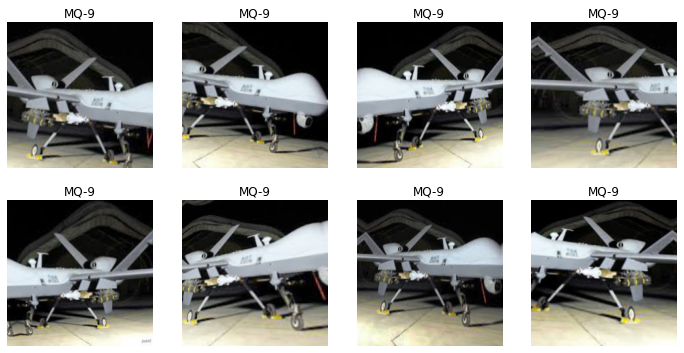

In [3]:
path = Path('/content/drive/MyDrive/repos/AC_Classifier/')
path.ls()
files = get_image_files(path/"images")
def label_func(f): return f[0].isupper()
print(f"{len(files)} files to be loaded, starting with {files[0].name}")
#def label_func(f): return re.sub("_[^_]+$", "",f) #rename folder based on filename
pat = r'^(.*)_\d+.jpg' #Image Categories from filename

dls = ImageDataLoaders.from_name_re(path,
                                    files,
                                    pat,
                                    item_tfms=RandomResizedCrop(224, min_scale=0.5),
                                    batch_tfms=aug_transforms())
print("dl's loaded! Generating a test batch.")

dls.train.show_batch(max_n=8,nrows=2, unique=True)

In [4]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [5]:
learn.fine_tune(1)

In [6]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [9]:
for idx in cleaner.delete():
  try: cleaner.fns[idx].unlink()
  except: pass
path.ls()
files = get_image_files(path/"images")
print(len(files))

dls = ImageDataLoaders.from_name_re(path,
                                    files,
                                    pat,
                                    item_tfms=RandomResizedCrop(224, min_scale=0.5),
                                    batch_tfms=aug_transforms())
learn = cnn_learner(dls, resnet34, metrics=error_rate)

2439


In [10]:
learn.fine_tune(2)

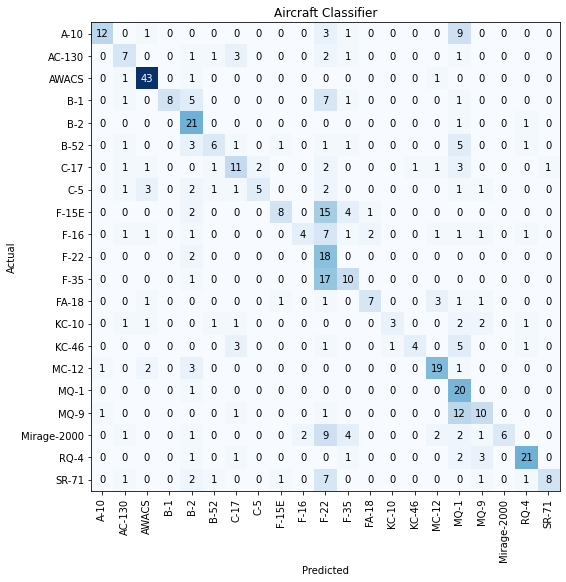

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), title='Aircraft Classifier')

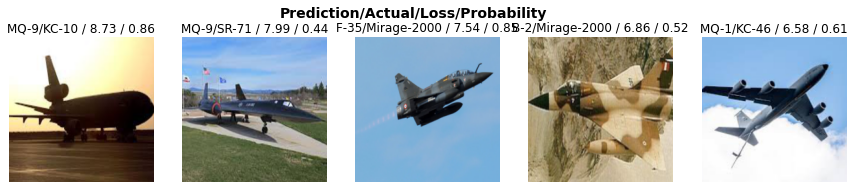

In [12]:
interp.plot_top_losses(5, nrows=1)

SuggestedLRs(lr_min=0.00010000000474974513, lr_steep=6.309573450380412e-07)

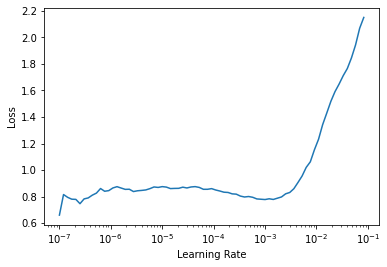

In [19]:
learn.lr_find()

In [1]:
learn.fit_one_cycle(3, 3e-4)

NameError: ignored

In [20]:
learn.fine_tune(2,base_lr=3e-3)